# Exercise 3: Perceptron

## 3.1 Perceptron for data classification

In order to demonstrate the main concepts behind the perceptron, we have to define input and output data. We will use $N$ two-dimensional vectors $\mathbf{a}_i$ as input data organized in a $2\times N$ matrix $\mathbf{A}$ (two rows and $N$ columns).

$\mathbf{A}=\begin{bmatrix}
    a_{x_1} & a_{x_2} & \dots & a_{x_N}\\
    a_{y_1} & a_{y_2} & \dots & a_{y_N}
\end{bmatrix}$

Here, $N$ is the number of vectors and $a_{x_i}$, $a_{y_i}$ are the $x$ and $y$ coordinates of $i$-th vector. In this example we will demonstrate how to classify vectors in two classes. In this case, each vector can belong to only one of two possible classes, for example $C_0$ and $C_1$. Classes of each examples are defined using a matrix $\mathbf{C}$, whose dimensions are $1\times N$ defined as follows:

$\mathbf{C}=\left[c_1, c_2, \dots, c_N\right]$

Each element $c_i$ has value $0$ if vector $\mathbf{a}_i$ belongs to class $C_0$ and has value $1$ if vector belongs to class $C_1$.

### 3.1.1 Classification of linearly separable examples in 2D space

In this experiment we will show how to use the perceptron in order to classify a vector in two linearly separable classes. We will use the following vectors as input vectors:

In [4]:
import numpy as np

a1=np.array([[1, 1]]).T
a2=np.array([[1, 1]]).T
a3=np.array([[2, 0]]).T
a4=np.array([[1, 2]]).T
a5=np.array([[2, 1]]).T

print(a1)

[[1]
 [1]]


Here, vectors $\mathbf{a}_1$, $\mathbf{a}_2$ and $\mathbf{a}_3$ belong to class $C_0$ and other vectors belong to class $C_1$. Form the matrices $\mathbf{A}$ and $\mathbf{C}$ as explained. Plot the vectors.

[[1 1 2 1 2]
 [1 1 0 2 1]]


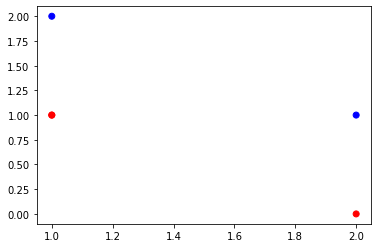

In [ ]:
A=np.hstack([a1, a2, a3, a4, a5])
C=np.array([[0, 0, 0, 1, 1]])

print(A)

import matplotlib.pyplot as plt

plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
plt.show()

Vectors belonging to the same class have the same symbol in the plot. You can initialize the perceptron as follows:

In [ ]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, C)

W

array([[0.11381707, 0.14199308, 0.37875296]])

Here, vector $\mathbf{W}$ is the vector with neural network weights. The first column of $\mathbf{W}$ represents the threshold value. The hyperplane can be visualized using following command:

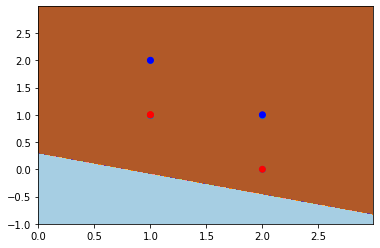

In [ ]:
def predict(W, A):
    return (W@np.vstack([-np.ones((1, A.shape[1])), A])>=0).astype(int)

def plot(W, A):
    x_start, x_end=A[0, :].min()-1, A[0, :].max()+1
    y_start, y_end=A[1, :].min()-1, A[1, :].max()+1
    
    xx, yy=np.meshgrid(np.arange(x_start, x_end, 0.01), np.arange(y_start, y_end, 0.01))
    grid=np.vstack([xx.ravel(), yy.ravel()])
    
    # print('xx: ', xx)
    # print('grid:', grid)

    Z=predict(W, grid).reshape(xx.shape)
    # print('Z: ', Z)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(A[0, :], A[1, :])
    
    plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
    plt.show()

plot(W, A)

Previously initialized perceptron can be trained by calling the function *trainlms_p* until correct (or satisfactory) segmentation (division) of the plain is achieved:

In [ ]:
def trainlms_p(ni, x, d, W, max_epoch): 
    w=W.copy()
    
    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

**Tasks**

1. Plot the plane and positions of last vectors with the classification plane in two cases: before and after training. Are classes $C_1$ and $C_2$ correctly separated in both cases?
2. Show the segmentation error with regards to training iteration.
3. Think of an experiment where you will use the perceptron to find the border in 2D space and train the required perceptron.
4. Think of an experiment where you will use the perceptron to find the border in 3D space and train the required perceptron.

**Answers**
1. Classes $C_1$ and $C_2$ are only correctly separated after the training
2. Line plot below
3. The experiment in the next code cells
4. instead of a line separating the 2 classification planes, it would be a plane separating 2 classification areas

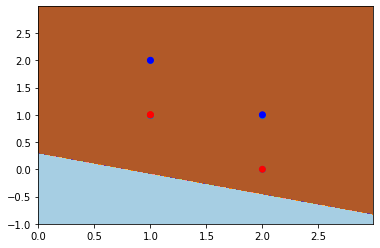

[[5.11381707 1.64199308 3.37875296]] [3, 2, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 0]


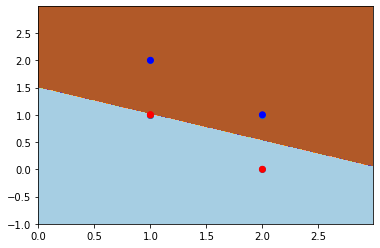

In [ ]:
ni=0.5
max_num_iter=1000

plot(W, A)
M, errors=trainlms_p(ni, A, C, W, max_num_iter)
print(M, errors)
plot(M, A)

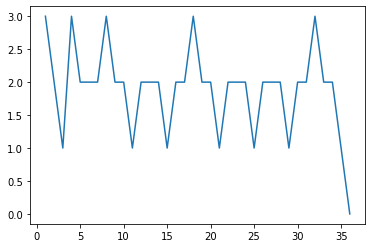

In [ ]:
plt.plot(range(1, len(errors)+1), errors)
plt.show()

### 3.1.2 Linearly inseparable case in 2D

In this experiment we will try to train a perceptron for two linearly inseparable classes. To be more precise, we will try to solve the logical XOR function problem. Input vectors ai will represent the function inputs and classes $C_0$ and $C_1$ will represent the function values:

In [ ]:
A=np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
C=np.array([[0, 1, 1, 0]])

**Tasks**

1. Use the same training procedure from the first experiment. Plot the obtained results (i.e. plot the input vectors before and after the training phase in the same window). Plot the error as well.
2. Did perceptron learn to solve the XOR problem? Explain why.

**Answers**
1. Code below
2. The perceptron did not learn to solve because the problem is not linearly separable

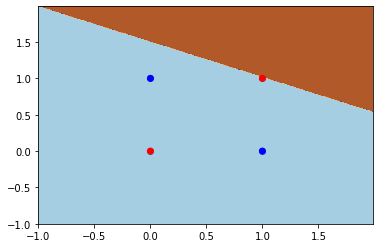

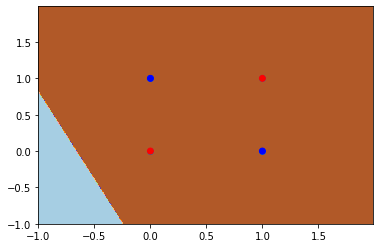

errors: [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

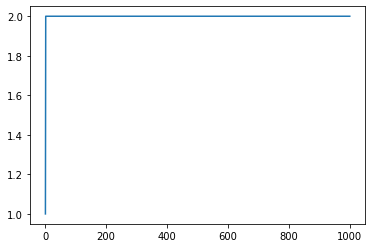

In [ ]:
W=initp(A, C)
plot(M, A)
M, errors=trainlms_p(ni, A, C, W, max_num_iter)
plot(M, A)
print('errors:', errors)
print('C: ', C)
print('predict: ', predict(M, A))
plt.plot(range(1, len(errors)+1), errors)
plt.show()

### 3.1.3 Classification of linearly separable examples in 3D space

This experiment shows how to classify examples in 3D space. Input vectors are three dimensional and belong to 2 classes which are linearly separable. Input vectors are:

In [ ]:
a1=np.array([[0, 0, 0]]).T
a2=np.array([[0, 0, 1]]).T
a3=np.array([[0, 1, 0]]).T
a4=np.array([[0, 1, 1]]).T
a5=np.array([[1, 0, 0]]).T

A=np.hstack([a1, a2, a3, a4, a5])
C=np.array([[0, 1, 0, 0, 1]])

A

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0]])

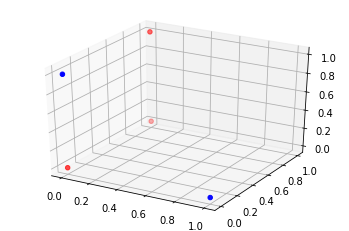

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(A[0, :], A[1, :], A[2, :],color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
plt.show()

Here, vectors $\mathbf{a}_1$, $\mathbf{a}_3$ and $\mathbf{a}_4$ belong to class $C_0$ and other vectors belong to class $C_1$.

**Tasks**

1. Repeat the learning procedure from 3.1.1. and show the obtained results with plot of the error.
2. Change the vector classes until classes $C_0$ and $C_1$ become linearly inseparable. When does this happen?

1. Plot tends to 0
2. vector $\mathbf{a}_2$ becomes $(-1, 0, 0)$. Error functions does not converge to 0

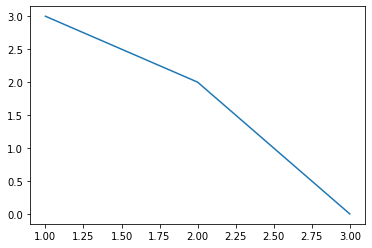

[[0 1 0 0 1]]
[[0 1 0 0 1]]


array([[ 0.12324638,  0.15241674, -1.23561024,  0.35768894]])

In [ ]:
W=initp(A, C)
M, errors=trainlms_p(ni, A, C, W, max_num_iter)

plt.plot(range(1, len(errors)+1), errors)
plt.show()

print(C)
print(predict(M, A))

M

## 3.2 Classification of examples with Gaussian distribution

The second part of this exercise tries to show how to classify examples with Gaussian distribution, which can be typically found in real life problems.

Suppose we have two classes of 2D vectors, where each class represents the realization of the random vector with Gaussian distribution. We will set the mean value and standard deviation of the first class to $E(C_0)=(10, 10)$ and $S(C_0)=2.5$ for each of the components. The second class will have the expected value $E(C_1)=(20, 5)$ and standard deviation $S(C_1)=2$. Create 100 vectors for each class as follows:

In [ ]:
A1=np.random.normal((10, 10), (2.5, 2.5), size=(100,2)).T
A2=np.random.normal((20, 5), (2, 2), size=(100,2)).T

A1, A2

(array([[10.80207424,  9.4307903 ,  9.12016107,  9.03764251, 11.46390302,
         12.43128678, 15.38627344, 10.70150885, 12.26164428,  8.13528752,
         10.31661667,  7.20818466,  7.74506219, 11.00567306,  5.45167469,
         10.83088095, 11.49703566,  7.09175686, 10.28434936, 13.91937324,
         10.1670638 , 13.57053624,  8.15804868, 13.78165436,  8.36114278,
         15.75410975, 10.087672  , 10.35478699,  7.69135709, 10.33023581,
          7.64685184,  8.69277431,  8.92972031,  8.53643585,  9.12907   ,
         10.54566427, 13.35273191, 10.50185122,  5.2207529 ,  7.04264021,
         10.72940772,  9.05896173, 10.04268733, 15.55851896,  6.62563019,
          7.64908595, 13.17218587, 10.8930038 ,  8.94152477,  5.83334594,
          8.01374097,  7.93457535, 11.26569612, 13.35508985,  6.98400698,
         10.5781428 , 12.53229069,  8.16194676, 10.2474556 ,  9.23133596,
         10.19170258, 12.48484694, 11.15285218,  9.59802969,  9.64623731,
          5.28513189,  7.86166255, 13.

After this step we have to construct the matrix $\mathbf{A}$ containing vectors $\mathbf{A}_1$ and $\mathbf{A}_2$. We have to form the vector $\mathbf{C}$ which says that first that 100 elements belong to class $C_0$ and other elements belong to class $C_1$:

In [ ]:
A=np.hstack([A1, A2])
C=np.hstack([np.zeros((1,100)), np.ones((1, 100))]).astype(int)

print(A)
print(C)

[[10.80207424  9.4307903   9.12016107  9.03764251 11.46390302 12.43128678
  15.38627344 10.70150885 12.26164428  8.13528752 10.31661667  7.20818466
   7.74506219 11.00567306  5.45167469 10.83088095 11.49703566  7.09175686
  10.28434936 13.91937324 10.1670638  13.57053624  8.15804868 13.78165436
   8.36114278 15.75410975 10.087672   10.35478699  7.69135709 10.33023581
   7.64685184  8.69277431  8.92972031  8.53643585  9.12907    10.54566427
  13.35273191 10.50185122  5.2207529   7.04264021 10.72940772  9.05896173
  10.04268733 15.55851896  6.62563019  7.64908595 13.17218587 10.8930038
   8.94152477  5.83334594  8.01374097  7.93457535 11.26569612 13.35508985
   6.98400698 10.5781428  12.53229069  8.16194676 10.2474556   9.23133596
  10.19170258 12.48484694 11.15285218  9.59802969  9.64623731  5.28513189
   7.86166255 13.67199014 12.63013661 10.45938401 11.80339435  8.67431163
   9.93208143 15.05314129  9.77957814 10.78661245  8.8057959   7.19606247
   7.54878016 10.22421175  9.41537625  

**Tasks**

1. Repeat the training procedure from the first part of the exercise. Plot the obtained results.
2. How many examples were misclassified?
3. If the input vector is given as $\mathbf{a}_i$=(10,3) where would we classify this example?

**Answers**
1. Code cell below 1
2. Code cell below 2
3. Classified as C0, but depends on random input numbers

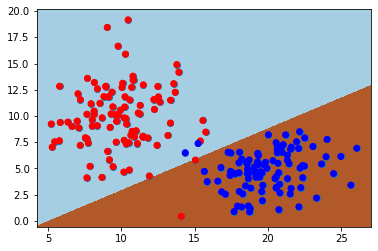

In [ ]:
W=initp(A, C)
M, errors=trainlms_p(ni, A, C, W, max_num_iter)
plot(M, A)

In [ ]:
print("Number of misclassified examples: %d"%(np.sum(np.absolute(C-predict(M, A)))))

Number of misclassified examples: 4


In [ ]:
a=np.array([[10], [3]])
print("Classified as C%d."%predict(M, a)[0][0])

Classified as C0.


### 3.3.1 Classification of examples using two perceptrons

The third part of the exercise shows how to use more than one perceptron in order to classify input vectors in larger number of classes. In Figure 4 we can see a network with two perceptrons which can be used in order to classify the examples in four linearly inseparable classes.

![Two perceptrons](https://drive.google.com/uc?id=1iIoO2ypqmUxI3DtBtGmtmGPn_-nD7duj)
<center>Figure 4. Two perceptrons for classification in four classes (outputs are binary coded)</center>

Suppose we have 10 2D input vectors defined with matrix $\mathbf{A}$ where each column of the matrix represents one input vector:

In [ ]:
A=np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5], [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])
A

array([[ 0.1,  0.7,  0.8,  0.8,  1. ,  0.3,  0. , -0.3, -0.5, -1.5],
       [ 1.2,  1.8,  1.6,  0.6,  0.8,  0.5,  0.2,  0.8, -1.5, -1.3]])

Matrix $\mathbf{C}$ is used to define in which class each input vector belongs to:

In [ ]:
C=np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]);
C

array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

Each column of the matrix $\mathbf{C}$ is a 2D vector, where each two bits represent the binary coded class value for each input vector. Using two bits we can binary code four different values, which represent the class names: $C_0$, $C_1$, $C_2$, $C_3$. This network is trained using the same procedure used for the network with only one perceptron.

**Tasks**

1. Train the network. Plot the obtained results with plot of the error.

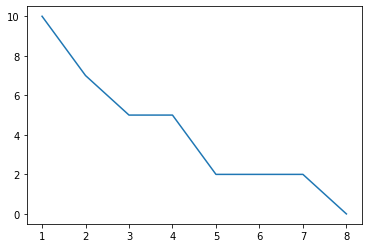

In [ ]:
W=initp(A, C)
M, errors=trainlms_p(ni, A, C, W, max_num_iter)
plt.plot(range(1, len(errors)+1), errors)
plt.show()